In [6]:
# configure matplotlib
%matplotlib inline

import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', 6)


In [7]:
import geoplot as gplt
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.7898 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


<Axes: >

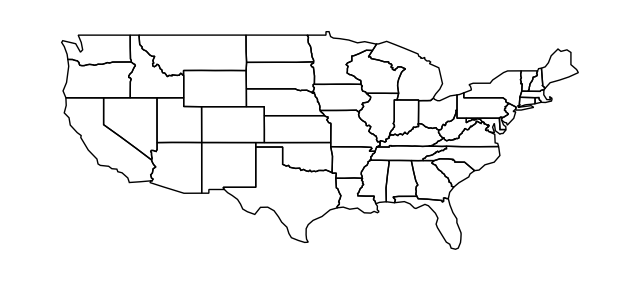

In [9]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

<Axes: >

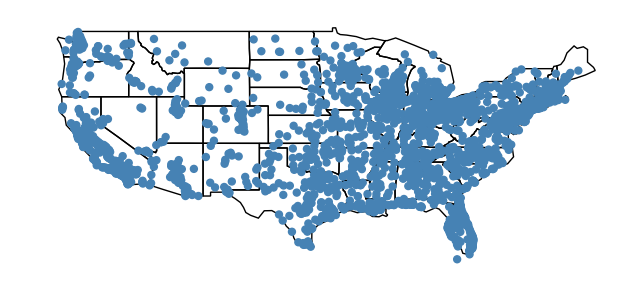

In [10]:
ax = gplt.polyplot(contiguous_usa)
conus_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(conus_cities, ax=ax)

<GeoAxes: >

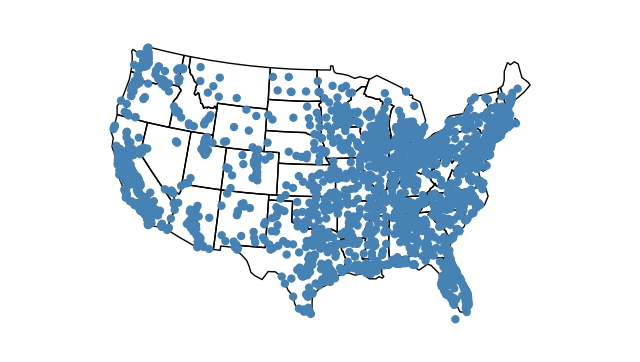

In [11]:
ax = gplt.polyplot(contiguous_usa, projection=gplt.crs.AlbersEqualArea())
gplt.pointplot(conus_cities, ax=ax)

<GeoAxes: >

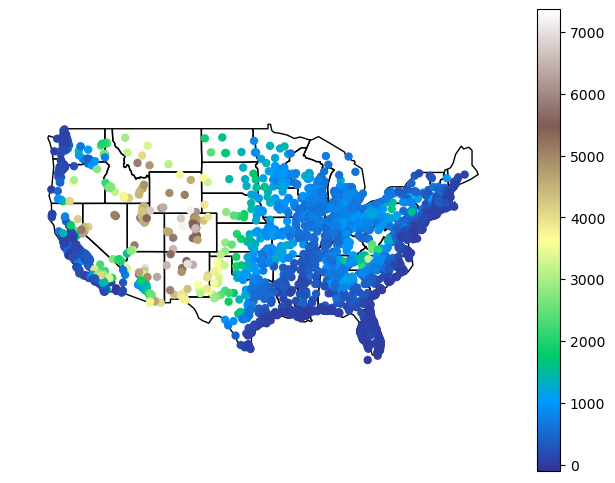

In [15]:
ax = gplt.polyplot(contiguous_usa, projection=gplt.crs.WebMercator())
gplt.pointplot(conus_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

Text(0.5, 1.0, 'Cities in the contiguous United States by elevation')

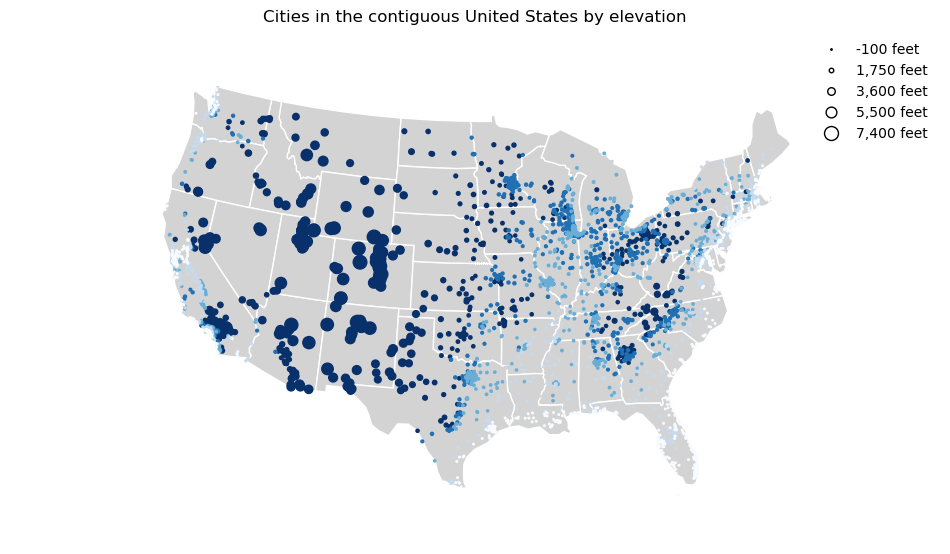

In [24]:
ax = gplt.polyplot(
    contiguous_usa, projection=gplt.crs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)

gplt.pointplot(
    conus_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles', legend=True,
    scale='ELEV_IN_FT', limits=(1, 10),
    legend_var='scale', legend_values=[-100, 1750, 3600, 5500, 7400],
    legend_kwargs={'frameon': False},
    legend_labels=['-100 feet', '1,750 feet', '3,600 feet', '5,500 feet', '7,400 feet']
)

ax.set_title('Cities in the contiguous United States by elevation')

/opt/anaconda3/envs/carto/lib/python3.9/site-packages/geoplot/geoplot.py:966: UserWarning: Numba not installed. Using slow pure python version.
  self.set_hue_values(color_kwarg=None, default_color=None)


<GeoAxes: >

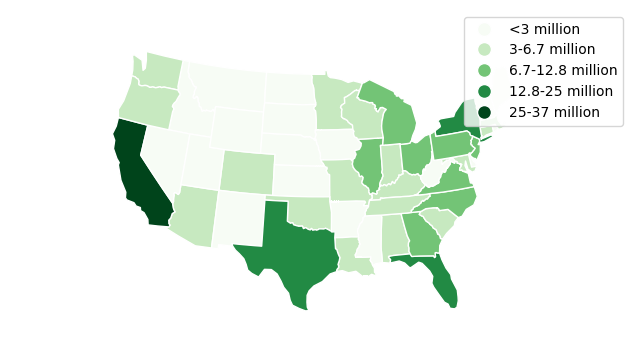

In [17]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gplt.crs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)

<GeoAxes: >

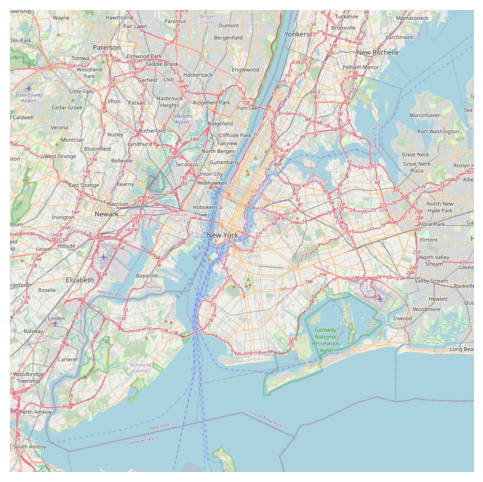

In [21]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

gplt.webmap(boroughs, projection=gplt.crs.WebMercator())

<GeoAxes: >

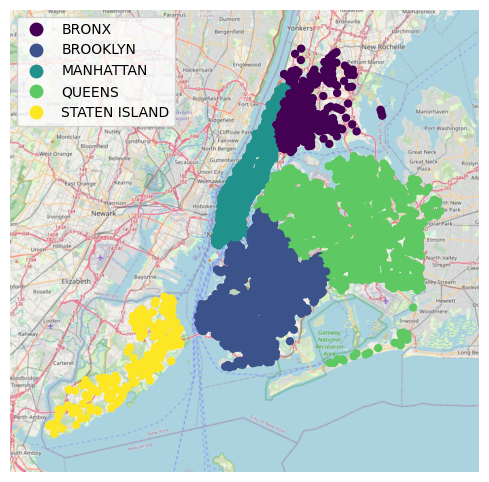

In [22]:
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.webmap(boroughs, projection=gplt.crs.WebMercator())
gplt.pointplot(
    collisions[collisions['BOROUGH'].notnull()],
    hue='BOROUGH', ax=ax, legend=True
)